In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [3]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

**Q1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?**








Copying images to training, validation, and test directories

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

Reading pictures with "image_dataset_from_directory"

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation= image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test= image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Construct a dataset instance using a NumPy array containing 1000 random samples, with each sample having a vector size of 16

In [7]:
import numpy as np
import tensorflow as tf
random_num = np.random.normal(size=(1000, 16))
data = tf.data.Dataset.from_tensor_slices(random_num)

In [8]:
for i, element in enumerate(data):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batchdata = data.batch(32)
for i, element in enumerate(batchdata):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshapedata = data.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshapedata):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Developing the model

Creating a tiny network for categorizing dogs versus cats

In [11]:
for data_batch, labels_batch in train:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

input = keras.Input(shape=(180, 180, 3))
a = layers.Rescaling(1./255)(input)
a = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.Flatten()(a)
a = layers.Dropout(0.5)(a)
output1 = layers.Dense(1, activation="sigmoid")(a)
model1 = keras.Model(inputs=input, outputs=output1)

preparing  model for training

In [13]:
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

We first build the model, then use the training dataset to train it. At the conclusion of each epoch, we validate the model's performance using the validation dataset. In order to shorten the execution time of each epoch, I'm using GPU.

In [14]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

Dataset is used for model fitting

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callback1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model1.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callback1)

Epoch 1/10
63/63 [==============================] - 3s 42ms/step - loss: 0.5826 - accuracy: 0.6890 - val_loss: 0.6756 - val_accuracy: 0.6070
Epoch 2/10
63/63 [==============================] - 3s 40ms/step - loss: 0.5517 - accuracy: 0.7170 - val_loss: 0.7868 - val_accuracy: 0.6360
Epoch 3/10
63/63 [==============================] - 3s 42ms/step - loss: 0.5407 - accuracy: 0.7300 - val_loss: 0.6546 - val_accuracy: 0.6550
Epoch 4/10
63/63 [==============================] - 3s 40ms/step - loss: 0.4963 - accuracy: 0.7575 - val_loss: 0.6998 - val_accuracy: 0.6450
Epoch 5/10
63/63 [==============================] - 3s 42ms/step - loss: 0.4552 - accuracy: 0.7720 - val_loss: 0.6343 - val_accuracy: 0.7070
Epoch 6/10
63/63 [==============================] - 3s 40ms/step - loss: 0.3804 - accuracy: 0.8275 - val_loss: 0.6536 - val_accuracy: 0.7030
Epoch 7/10
63/63 [==============================] - 3s 40ms/step - loss: 0.3460 - accuracy: 0.8390 - val_loss: 0.7860 - val_accuracy: 0.6770
Epoch 8/10
63

For better visualization and understanding the curves of loss and accuracy during training were constructed

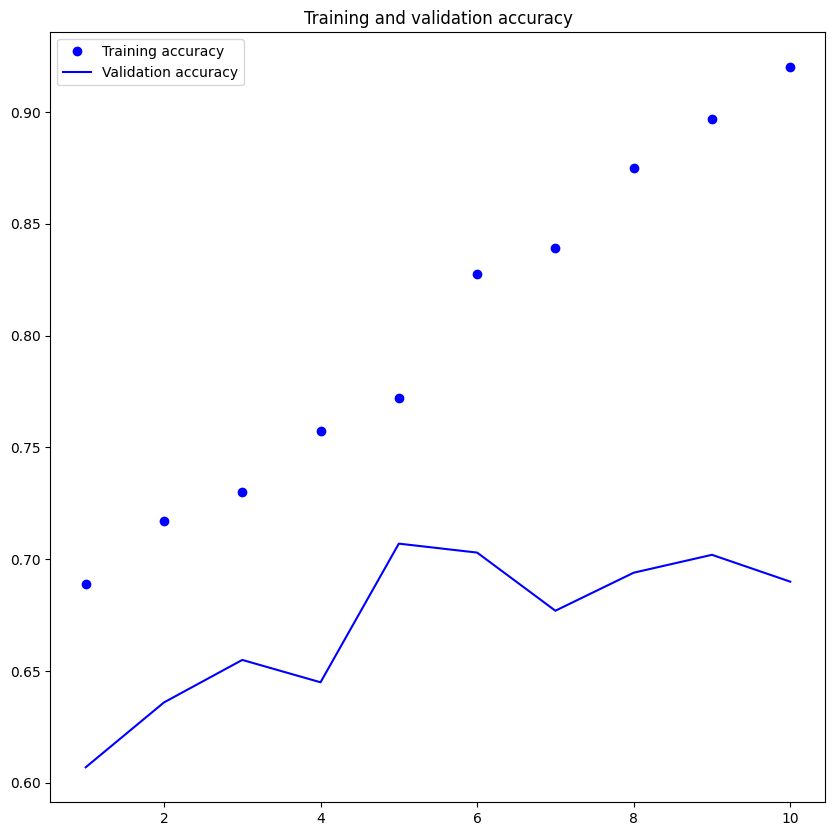

<Figure size 640x480 with 0 Axes>

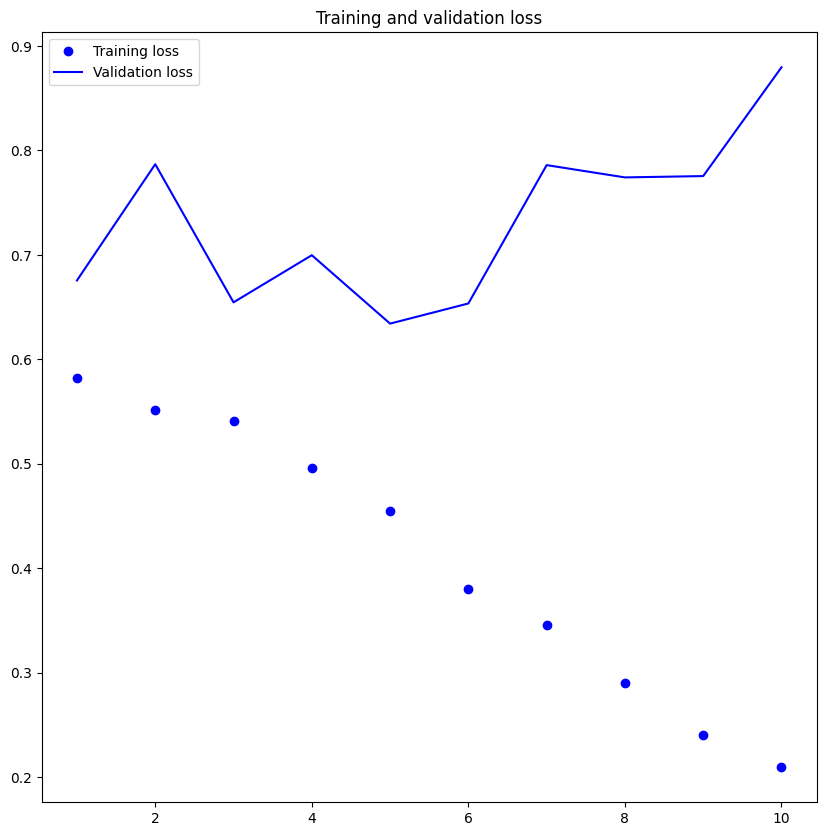

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history1.history["accuracy"]
val_accuracy1 = history1.history["val_accuracy"]
loss1 = history1.history["loss"]
val_loss1 = history1.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
testacc1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = testacc1.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 15ms/step - loss: 0.6382 - accuracy: 0.6970
Test accuracy: 0.697


From the above result we can conclude that the test accuracy with no data augmentation is about 69.7% when the Training accuracy is about 92%.

**Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?**

Using data augmentation

Define a data augmentation stage to add to an image model

In [19]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [20]:
augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

showing the training augmented pictures

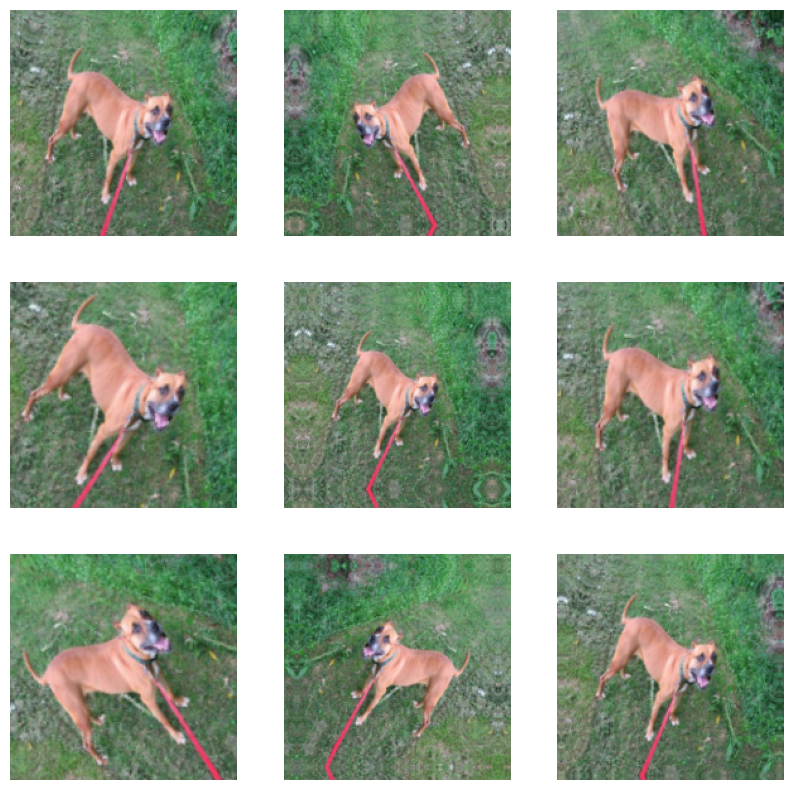

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_pics = augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_pics[0].numpy().astype("uint8"))
        plt.axis("off")

Creating a new convolutional neural network with dropout and picture augmentation

In [22]:
input2 = keras.Input(shape=(180, 180, 3))
b = augmentation(input2)
b = layers.Rescaling(1./255)(b)
b = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(b)
b = layers.Flatten()(b)
b = layers.Dropout(0.5)(b)
output2 = layers.Dense(1, activation="sigmoid")(b)
model2 = keras.Model(inputs=input2, outputs=output2)

model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model2.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callback2)

Epoch 1/30
63/63 [==============================] - 5s 48ms/step - loss: 0.6962 - accuracy: 0.5020 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 3s 44ms/step - loss: 0.6928 - accuracy: 0.5150 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6956 - accuracy: 0.5040 - val_loss: 0.6930 - val_accuracy: 0.5030
Epoch 4/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6857 - val_accuracy: 0.5780
Epoch 5/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6888 - accuracy: 0.5330 - val_loss: 0.6647 - val_accuracy: 0.5960
Epoch 6/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6799 - accuracy: 0.5645 - val_loss: 0.6635 - val_accuracy: 0.5970
Epoch 7/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6756 - accuracy: 0.5820 - val_loss: 0.6704 - val_accuracy: 0.5800
Epoch 8/30
63

model evaluated based on test set

In [24]:
testacc2 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = testacc2.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 14ms/step - loss: 0.4952 - accuracy: 0.7760
Test accuracy: 0.776


**Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.**



Step 3 involved the usage of test sets including 500 samples and 2000 training samples with validation. Compared to training samples of 1000 and 2000 photos, I have found that test accuracy is higher with 1500 images.

When there are 1000 training samples, training accuracy improves.

Raising the training sample to 2000 while maintaining the 500-sample validation and test sets

In [25]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

A new convnet with increased training samples,image augmentation and dropout

In [26]:
i3 = keras.Input(shape=(180, 180, 3))
c = augmentation(i3)
c = layers.Rescaling(1./255)(c)
c = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(c)
c = layers.Flatten()(c)
c = layers.Dropout(0.5)(c)
out3 = layers.Dense(1, activation="sigmoid")(c)
mod3 = keras.Model(inputs=i3, outputs=out3)

mod3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [27]:
callback3 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist3 = mod3.fit(
    train,
    epochs=50,
    validation_data=validation,
    callbacks=callback3)

Epoch 1/50
63/63 [==============================] - 5s 47ms/step - loss: 0.6984 - accuracy: 0.5005 - val_loss: 0.6861 - val_accuracy: 0.5990
Epoch 2/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6927 - accuracy: 0.5030 - val_loss: 0.6928 - val_accuracy: 0.5080
Epoch 3/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6888 - accuracy: 0.5175 - val_loss: 0.6917 - val_accuracy: 0.5130
Epoch 4/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6890 - accuracy: 0.5205 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 5/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6820 - accuracy: 0.5660 - val_loss: 0.6702 - val_accuracy: 0.5630
Epoch 6/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6674 - accuracy: 0.5810 - val_loss: 0.6638 - val_accuracy: 0.5910
Epoch 7/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6636 - accuracy: 0.6155 - val_loss: 0.6454 - val_accuracy: 0.6340
Epoch 8/50
63

In [28]:
acc_test3 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = acc_test3.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 15ms/step - loss: 0.4544 - accuracy: 0.8320
Test accuracy: 0.832


**Q4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.**



Instantiating the VGG16 convolutional base

In [29]:
convolution_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [30]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

using a pretrained model for feature extraction without data augmentation

obtaining the labels that correlate with the VGG16 characteristics

In [31]:
import numpy as np

def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels =  get_features_and_labels(train)
val_features, val_labels =  get_features_and_labels(validation)
test_features, test_labels =  get_features_and_labels(test)

1/1 [==============================] - 0s 19ms/step


In [32]:
train_features.shape

(2000, 5, 5, 512)

In [33]:
i6 = keras.Input(shape=(5, 5, 512))
d = layers.Flatten()(i6)
d = layers.Dense(256)(d)
d = layers.Dropout(0.5)(d)
out6 = layers.Dense(1, activation="sigmoid")(d)
m6 = keras.Model(i6, out6)
m6.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback6 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
hist6 = m6.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback6)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 20.0721 - accuracy: 0.9255 - val_loss: 2.9976 - val_accuracy: 0.9720
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 3.8485 - accuracy: 0.9755 - val_loss: 2.8271 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.8329 - accuracy: 0.9850 - val_loss: 6.8690 - val_accuracy: 0.9610
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1630 - accuracy: 0.9910 - val_loss: 7.7085 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.7020 - accuracy: 0.9865 - val_loss: 4.0548 - val_accuracy: 0.9810
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9985 - val_loss: 2.9556 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.9965 - val_loss: 3.3398 - val_accuracy: 0.9800
Epoch 8/20
63/63 [

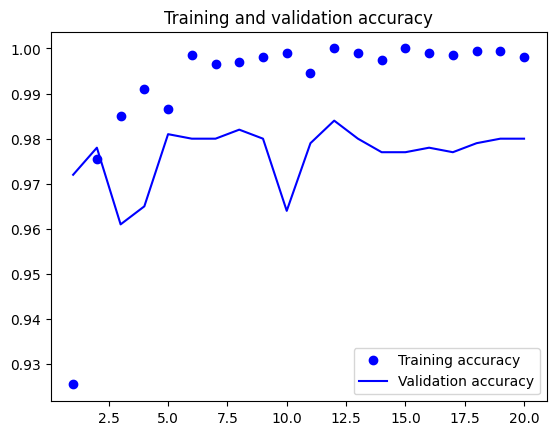

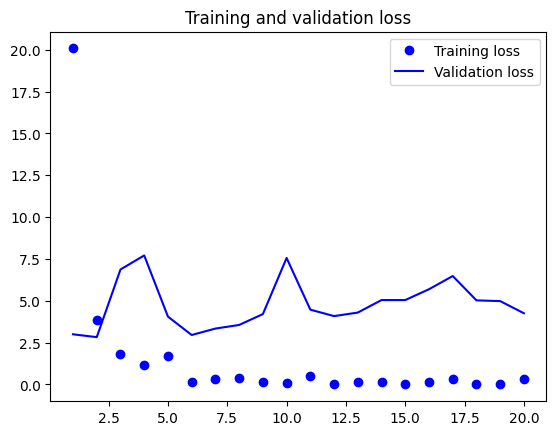

In [34]:
import matplotlib.pyplot as plt
accuracy6 = hist6.history["accuracy"]
valaccuracy6 = hist6.history["val_accuracy"]
los6 = hist6.history["loss"]
vallos6 = hist6.history["val_loss"]
epochs = range(1, len(accuracy6) + 1)
plt.plot(epochs, accuracy6, "bo", label="Training accuracy")
plt.plot(epochs, valaccuracy6, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, los6, "bo", label="Training loss")
plt.plot(epochs, vallos6, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

VGG16 convolutional base instantiation and freezing

In [35]:
convolution_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base.trainable = False

convolution_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base.trainable_weights))

convolution_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Model is now performing with a classifier and agumentation to convulation base

In [36]:
augmentation2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

input22 = keras.Input(shape=(180, 180, 3))
x1 = augmentation2(input22)
x1 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = convolution_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.5)(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(input22, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])




In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callbacks
)

Epoch 1/10
63/63 [==============================] - 11s 149ms/step - loss: 16.1988 - accuracy: 0.8900 - val_loss: 4.8509 - val_accuracy: 0.9650
Epoch 2/10
63/63 [==============================] - 9s 150ms/step - loss: 7.3679 - accuracy: 0.9480 - val_loss: 2.8427 - val_accuracy: 0.9760
Epoch 3/10
63/63 [==============================] - 9s 144ms/step - loss: 5.1170 - accuracy: 0.9575 - val_loss: 3.6323 - val_accuracy: 0.9770
Epoch 4/10
63/63 [==============================] - 9s 143ms/step - loss: 3.8931 - accuracy: 0.9675 - val_loss: 6.9037 - val_accuracy: 0.9610
Epoch 5/10
63/63 [==============================] - 9s 141ms/step - loss: 3.7655 - accuracy: 0.9665 - val_loss: 2.9158 - val_accuracy: 0.9840
Epoch 6/10
63/63 [==============================] - 9s 146ms/step - loss: 4.0730 - accuracy: 0.9690 - val_loss: 2.5167 - val_accuracy: 0.9860
Epoch 7/10
63/63 [==============================] - 9s 139ms/step - loss: 2.8915 - accuracy: 0.9710 - val_loss: 3.9748 - val_accuracy: 0.9730
Epoc

In [38]:
test_model = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 88ms/step - loss: 5.8568 - accuracy: 0.9720
Test accuracy: 0.972


Fine-tuning a pretrained model


Freezing all layers until the fourth from the last

In [39]:
convolution_base.trainable = True
for layer in convolution_base.layers[:-4]:
    layer.trainable = False

In [40]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbackstu = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
historytune = model.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callbackstu)

Epoch 1/30
63/63 [==============================] - 13s 166ms/step - loss: 2.7030 - accuracy: 0.9735 - val_loss: 2.1933 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 10s 165ms/step - loss: 0.7652 - accuracy: 0.9865 - val_loss: 2.0888 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 10s 165ms/step - loss: 1.2239 - accuracy: 0.9835 - val_loss: 1.8108 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 10s 155ms/step - loss: 0.9989 - accuracy: 0.9870 - val_loss: 1.9745 - val_accuracy: 0.9780
Epoch 5/30
63/63 [==============================] - 10s 162ms/step - loss: 0.8587 - accuracy: 0.9815 - val_loss: 1.4554 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 10s 152ms/step - loss: 0.6962 - accuracy: 0.9850 - val_loss: 1.5061 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 10s 160ms/step - loss: 0.7113 - accuracy: 0.9875 - val_loss: 1.1755 - val_accuracy: 0.9840

In [41]:
model_tuning = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 88ms/step - loss: 2.6754 - accuracy: 0.9710
Test accuracy: 0.971
